# CASE 1 - Capstone Webscrapping using BeautifulSoup

Di dalam program ini , kita mencoba untuk webscrapping data di halaman https://news.mifx.com/kurs-valuta-asing?kurs=JPY, di sini kita mencoba untuk mengambil data kurs japan yang di tampilkan di halaman web tersebut, kemudian coba untuk menganalisa dan memvisualisasikan dalam bentuk chart di halaman web yang akan kita bikin,

Di sini kita mnggunakan beberapa library :
- Beautifulsoup4 (untuk scrapping data dari web)
- Flask (untuk menampilkan Visualisasi di web)
- Pandas (untuk proses EDA)
- Matplotlib (Untuk memvisualisasikan dalam bentuk chart)
- Requests (untuk request url)



Pertama kita untuk membuat koneksi ke halaman web https://news.mifx.com/kurs-valuta-asing?kurs=JPY sekaligus menyalin data htmlnya ke komputer lokal

In [1]:
import requests

url_get = requests.get('https://news.mifx.com/kurs-valuta-asing?kurs=JPY')

Kemudian kita check datanya, apakah sudah sesuai dengan html webpage nya, akan tetapi bentuknya masih belum terstruktur

In [2]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" />\n<meta name="description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta property="og:description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />'

Karena bentuknya belum terstruktur maka kita membutuhkan library `BeautifulSoup` untuk mem-parser datanya supaya lebih tertata dan datanya di simpan di variable soup

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Mari kita lihat hasilnya, kita coba mengambil dari baris pertama sampai baris 1045 

In [4]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"/>
  <meta content="Ultimaen

Setelah itu kita mencoba untuk mencari data yang di butuhkan dalam hal ini kurs yen dari table yang ada di halaman website, untuk cara cepatnya kita bisa memakai menu inpect di halaman web browsernya dan kita klik tablenya ( di balik juga gapapa, klik kanan table baru inspect), maka di situ akan terlihat structur html dari table tersebut. Kita cari key Table, kemudian ambil class nya dan di masukan ke attribute soup.find 

In [5]:
table = soup.find('table', attrs={'class':'centerText newsTable2'})
print(table.prettify()[1:500])

table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   07 Agustus 2020
  </td>
  <td>
   139,42
  </td>
  <td>
   138,02
  </td>
 </tr>
 <tr>
  <td>
   06 Agustus 2020
  </td>
  <td>
   138,88
  </td>
  <td>
   137,48
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   05 Agustus 2020
  </td>
  <td>
   139,


Setelah terlihat lebih rapi, untuk table di HTML biasanya mengandung 3 atrribute :
- TH --> table Header 
- TR --> table Raw
- TD --> table Data

di karenakan kita mau mengambil data per baris sehingga kita fokus di TR dan TD, sehingga untuk pertama kali kita ambil adalah data per raw (TR), dimana data per raw (TR) ini terdiri dari 3 data (TD)

In [6]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr

[<tr class="colorWhite fontsize14 firstRow">
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>07 Agustus 2020</td>
 <td>139,42</td>
 <td>138,02</td>
 </tr>]

setelah mengambil data per raw (TR) kemudian kita ambil data per kolom dalam baris (TD) dengan looping (for) dimana looping data dari 1 sampai jumlah TR yang ada di table tersebut akan di simpan dalam variable temp, sehingga di dapatkan data array di variable temp

In [7]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get bulan
    Tanggal = row.find_all('td')[0].text
    Tanggal = Tanggal.strip() #for removing the excess whitespace
    Tanggal= Tanggal.replace(u'\xa0', ' ')
    #get inflasi
    Ask = row.find_all('td')[1].text
    Ask = Ask.strip() #for removing the excess whitespace

    #get inflasi
    Bid = row.find_all('td')[2].text
    Bid = Bid.strip() #for removing the excess whitespace

    temp.append((Tanggal,Ask,Bid)) 
    
temp 

[('07 Agustus 2020', '139,42', '138,02'),
 ('06 Agustus 2020', '138,88', '137,48'),
 ('05 Agustus 2020', '139,23', '137,84'),
 ('04 Agustus 2020', '139,19', '137,79'),
 ('03 Agustus 2020', '139,72', '138,32')]

Karena datanya belum order ascending based on data maka kita lakukan sorting untuk membalikkan urutannya

In [8]:
temp = temp[::-1]
temp

[('03 Agustus 2020', '139,72', '138,32'),
 ('04 Agustus 2020', '139,19', '137,79'),
 ('05 Agustus 2020', '139,23', '137,84'),
 ('06 Agustus 2020', '138,88', '137,48'),
 ('07 Agustus 2020', '139,42', '138,02')]

Setelah proses scrapping selesai, di sini akan di lakukan EDA (Exploratory Data Analisis), yang di lakukan pertama tentunya merubah array menjadi dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Tanggal','Ask','Bid'))
df.head()

,Tanggal,Ask,Bid
0,03 Agustus 2020,"139,72","138,32"
1,04 Agustus 2020,"139,19","137,79"
2,05 Agustus 2020,"139,23","137,84"
3,06 Agustus 2020,"138,88","137,48"
4,07 Agustus 2020,"139,42","138,02"


Setelah di import ke dataframe, kita coba cek type data per seriesnya dan pastikan format numbernya sudah sesuai
- untuk Tanggal bisa pakai object atau bisa di rubah ke datetime64 ( jika di rubah ke datetime64, kita membutuhkan library date parser, karena formatnya tidak sesuai)
- untuk data Ask dan Bid ini harus kita rubah ke float 64, tapi di karenakan datanya masih mengandung "," di mana seharusnya ".", maka harus di rubah dulu format numbernya dengan replace, setelah itu baru di rubah ke float64 

In [10]:
df.dtypes

Tanggal    object
Ask        object
Bid        object
dtype: object

In [11]:
df['Ask'] = df['Ask'].str.replace(",",".")
df['Bid'] = df['Bid'].str.replace(",",".")
df['Ask'] = df['Ask'].astype('float64')
df['Bid'] = df['Bid'].astype('float64')

Karena di sini kita mau plot datanya ke dalam line chart dan supaya tanggal bisa menjadi axis maka untuk tanggal saya rubah menjadi index

In [12]:
df = df.set_index('Tanggal')

In [13]:
df

,Ask,Bid
Tanggal,,
03 Agustus 2020,139.72,138.32
04 Agustus 2020,139.19,137.79
05 Agustus 2020,139.23,137.84
06 Agustus 2020,138.88,137.48
07 Agustus 2020,139.42,138.02


Do the data visualisation here.

Terakhir tahap visualisasi, di sini kita menggunakan line plot dimana di gunakan untuk memvisualisasikan pergerakan harga dari kurs YEN day to day


C:\Users\User\anaconda3\envs\algoritma\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Tanggal'>

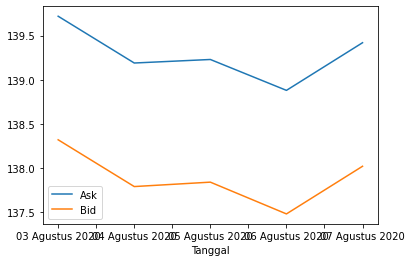

In [14]:
df.plot()

Setelah mendapatkan data dan melihat visualisasinya terlihat Trend Harga YEN JPY di banding IDR semakin lama semakin turun akan tetapi tanggal terakhir terlihat sedikit kenaikan Sehingga jika pengen investasi ke dalam mata uang yen adalah waktu yang tepat karena trendnya mulai bulish

Kesimpulannya :
untuk mendapatkan data dari web kita cukup menggunakan library beautifulsoup4 dengan memasukan beberapa kata kunci dalam pencarian data yang mau di scrapping
